In [29]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from helper import util_three_class
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
import os
import matplotlib.pyplot as plt

# 0. Train on types & count based

In [3]:
# train file name
train_file = '/path/to/9_FINAL/data/machine_learning/count_based/cross_validation/training_downsampled/training_0.csv'

In [4]:
# read file
train = pd.read_csv(train_file, sep=";",
                   index_col=0)
train.head()

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label
0,burslem,place,4,2,3,40086970,"['p8b', 'p8b', 'p1', 'p8b']",1,0,0,...,0,0,0,0,0,0,3,0,0,1
1,benny,producer,1,1,1,292471189,['p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,jasper,meeting,1,1,1,442206854,['p3a'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,flema,band,2,2,2,195079388,"['p8b', 'p8a']",0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,eriksen,invention,1,1,1,316927756,['p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# get value counts of train
train.label.value_counts()

1    91387
0    91387
Name: label, dtype: int64

In [6]:
# get x and y of train
y_train = train.label

In [8]:
# get X of train
X_train = train.drop(columns=['instance', 'class', 'id', 'pids', 'label'])
X_train.head()

,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,p13,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,4,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
# initialize Naive Bayes
nb = MultinomialNB()

In [10]:
# fit model on X_train
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# 1. Predict on Test

In [11]:
# get test
test = pd.read_csv('/path/to/9_FINAL/data/machine_learning/two_class/count-based/test/count_test.csv', 
                   sep=";", index_col=0)

In [12]:
# get head
test.head()

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label
0,preeti,victim,1,1,1,395309756,['p8b'],0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,magic,tomb,1,1,1,201370167,['p21a'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vii,horn,1,1,1,245826664,['p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,abigail,designer,5,1,4,49117817,"['p8a', 'p8a', 'p8a', 'p8a']",0,0,0,...,0,0,0,0,0,4,0,0,0,0
4,trip,hummingbird,1,1,1,417853003,['p5'],0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
# sanity check for labels
test.label.value_counts()

0    342108
1      6013
Name: label, dtype: int64

In [14]:
# get x and y of train
y_test = test.label

In [15]:
# get X of train
X_test = test.drop(columns=['instance', 'class', 'id', 'pids', 'label'])
X_test.head()

,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,p13,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [16]:
# predict on test
predict_test = nb.predict(X_test)

# 2. Get metrics on test

In [17]:
# get f1_score on test set
f1_score(y_test, predict_test, average='macro')

0.5245016382556573

In [18]:
# get confusion matrix 
confusion_matrix(y_test, predict_test)

array([[329090,  13018],
       [  5261,    752]])

In [22]:
# get all correctly classified indices
test_all = pd.read_csv('/path/to/9_FINAL/data/machine_learning/two_class/count-based/test/count_test.csv', 
                   sep=";", index_col=0)
test_all['Prediction'] = predict_test

In [23]:
test_all

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
0,preeti,victim,1,1,1,395309756,['p8b'],0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,magic,tomb,1,1,1,201370167,['p21a'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vii,horn,1,1,1,245826664,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,abigail,designer,5,1,4,49117817,"['p8a', 'p8a', 'p8a', 'p8a']",0,0,0,...,0,0,0,0,4,0,0,0,0,0
4,trip,hummingbird,1,1,1,417853003,['p5'],0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348116,westmoreland,writer,1,1,1,82288674,['p5'],0,0,0,...,0,1,0,0,0,0,0,0,0,0
348117,palenque,resort,2,1,2,481606216,"['p8a', 'p8a']",0,0,0,...,0,0,0,0,2,0,0,0,0,0
348118,report,racehorse,1,1,1,424940992,['p10'],0,1,0,...,0,0,0,0,0,0,0,0,0,0
348119,me,pediatrician,3,3,3,450472693,"['p21a', 'p3a', 'p8d']",0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 3. Correctly classified

In [25]:
# show all instances where subclass prediction and actual are the same
negatives_right=test_all[(test_all['label'] == 0) & (test_all['Prediction'] == 0)]
negatives_right

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
0,preeti,victim,1,1,1,395309756,['p8b'],0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,magic,tomb,1,1,1,201370167,['p21a'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vii,horn,1,1,1,245826664,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,abigail,designer,5,1,4,49117817,"['p8a', 'p8a', 'p8a', 'p8a']",0,0,0,...,0,0,0,0,4,0,0,0,0,0
4,trip,hummingbird,1,1,1,417853003,['p5'],0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348116,westmoreland,writer,1,1,1,82288674,['p5'],0,0,0,...,0,1,0,0,0,0,0,0,0,0
348117,palenque,resort,2,1,2,481606216,"['p8a', 'p8a']",0,0,0,...,0,0,0,0,2,0,0,0,0,0
348118,report,racehorse,1,1,1,424940992,['p10'],0,1,0,...,0,0,0,0,0,0,0,0,0,0
348119,me,pediatrician,3,3,3,450472693,"['p21a', 'p3a', 'p8d']",0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# show all instances where subclass prediction and actual are the same
test_all[(test_all['label'] == 0) & (test_all['Prediction'] == 1)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
5,particle,hydrocarbon,14,4,5,82722942,"['p5', 'p8a', 'p1', 'p8a', 'p1', 'p5', 'p1', '...",3,0,0,...,0,5,0,0,3,0,0,0,0,1
22,x,symbol,377,23,184,54062993,"['p26p5p4p29ap8ap27bp43', 'p8ap8b', 'p5p8ap3a'...",7,2,0,...,3,38,0,0,94,4,1,0,0,1
37,sequest,database,3,1,3,45564998,"['p5', 'p5']",0,0,0,...,0,2,0,0,0,0,0,0,0,1
49,hana,weapon,3,1,3,309816693,['p5'],0,0,0,...,0,1,0,0,0,0,0,0,0,1
73,rust,particulate,66,3,15,417639571,"['p5p4p1', 'p1', 'p1', 'p1', 'p1', 'p1', 'p1',...",10,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347940,balloon,rag,3,1,3,509080111,['p5'],0,0,0,...,0,1,0,0,0,0,0,0,0,1
348007,otter,leader,9,3,8,154944353,"['p1', 'p5', 'p3a', 'p5', 'p1', 'p3a', 'p1', '...",4,0,0,...,0,3,0,0,0,0,0,0,0,1
348062,scone,nutrient,2,1,2,291891740,"['p1', 'p1']",2,0,0,...,0,0,0,0,0,0,0,0,0,1
348066,fire,film,335,18,209,170218311,"['p5p23cp2p1p21dp10p8ap8bp3ap43', 'p5p1p10p3a'...",8,23,0,...,2,28,0,0,118,10,0,0,0,1


In [27]:
# show all instances where subclass prediction and actual are the same
test_all[(test_all['label'] == 1) & (test_all['Prediction'] == 0)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
13,flevoland,region,1,1,1,133065030,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,1,0
23,bapat,name,1,1,1,202072700,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,1,0
75,bidesiya,film,1,1,1,379439661,['p5'],0,0,0,...,0,1,0,0,0,0,0,0,1,0
228,misti,place,1,1,1,374223504,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,1,0
254,selkie,animal,1,1,1,396424801,['p3a'],0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347952,madeline,person,16,7,16,478248323,"['p8dp8a', 'p8ap43', 'p8a', 'p8b', 'p8b', 'p8a...",0,0,0,...,1,1,0,0,8,3,0,1,1,0
347966,clonakilty,village,2,2,2,218112454,"['p5', 'p1']",1,0,0,...,0,1,0,0,0,0,0,0,1,0
348028,ultop,toy,1,1,1,325455828,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,1,0
348055,kalatong,dance,3,1,2,357961278,"['p8a', 'p8a', 'p8a']",0,0,0,...,0,0,0,0,3,0,0,0,1,0


In [28]:
# show all instances where subclass prediction and actual are the same
test_all[(test_all['label'] == 1) & (test_all['Prediction'] == 1)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
791,piperaquine,drug,12,2,9,355165764,"['p8a', 'p5', 'p8a', 'p5', 'p5', 'p5']",0,0,0,...,0,4,0,0,2,0,0,0,1,1
1207,prophet,person,287,20,192,275012651,['p6p2p1p10p8ap43p8bp36p26p25p21dp20cp27bp20ap...,12,1,0,...,1,10,2,0,43,31,0,1,1,1
1997,lod,town,16,3,15,249734467,"['p5p1p8a', 'p1', 'p5', 'p8a', 'p8a', 'p1', 'p...",5,0,0,...,0,2,0,0,4,0,0,0,1,1
2923,r,program,332,22,228,299156469,"['p26p5p4p2p1p20cp8ap8bp3a', 'p5p8ap8b', 'p5p8...",10,0,0,...,2,42,0,1,123,5,0,1,1,1
3005,cavani,name,26,7,15,490542283,"['p5p20bp8ap3a', 'p5p2', 'p5', 'p5', 'p5', 'p2...",0,0,0,...,0,11,0,0,2,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345593,clematis,vine,50,4,39,379540907,"['p5p2p1p8a', 'p1p8a', 'p8a', 'p8a', 'p8a', 'p...",3,0,0,...,0,3,0,0,30,0,0,0,1,1
345888,member,agent,771,31,478,117293941,"['p36p26p4p1p8dp8ap8bp3a', 'p1', 'p4', 'p5p4p1...",37,0,0,...,0,29,1,0,138,45,7,3,1,1
346642,actuary,scientist,4,1,2,316396074,['p1'],1,0,0,...,0,0,0,0,0,0,0,0,1,1
348067,surveillance,technique,242,10,174,112809165,"['p5p1p10p3a', 'p5p4p1p43', 'p5p4p1p3a', 'p5p1...",33,5,0,...,1,41,0,0,10,0,0,0,1,1


# 4. Train Logistic Regression

In [30]:
# initialize logistic regression
lr = LogisticRegression()

In [31]:
# fit model on X_train
lr.fit(X_train, y_train)

/home/linda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# predict on test
predict_test = lr.predict(X_test)

In [33]:
# append array to test set
test_all['Prediction_lr'] = predict_test

In [35]:
# get all correct instances
test_all[(test_all['label'] == 0) &
        (test_all['Prediction'] == 0) &
        (test_all['Prediction_lr'] == 0)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_lr
0,preeti,victim,1,1,1,395309756,['p8b'],0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,magic,tomb,1,1,1,201370167,['p21a'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vii,horn,1,1,1,245826664,['p8a'],0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,abigail,designer,5,1,4,49117817,"['p8a', 'p8a', 'p8a', 'p8a']",0,0,0,...,0,0,0,4,0,0,0,0,0,0
4,trip,hummingbird,1,1,1,417853003,['p5'],0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348115,wood,diet,7,4,5,174851381,"['p23ap8a', 'p23a', 'p5', 'p3a', 'p3a']",0,0,0,...,1,0,0,1,0,0,0,0,0,0
348116,westmoreland,writer,1,1,1,82288674,['p5'],0,0,0,...,1,0,0,0,0,0,0,0,0,0
348117,palenque,resort,2,1,2,481606216,"['p8a', 'p8a']",0,0,0,...,0,0,0,2,0,0,0,0,0,0
348119,me,pediatrician,3,3,3,450472693,"['p21a', 'p3a', 'p8d']",0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
# get all correct instances
test_all[(test_all['label'] == 1) &
        (test_all['Prediction'] == 0) &
        (test_all['Prediction_lr'] == 0)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_lr
13,flevoland,region,1,1,1,133065030,['p8a'],0,0,0,...,0,0,0,1,0,0,0,1,0,0
23,bapat,name,1,1,1,202072700,['p8a'],0,0,0,...,0,0,0,1,0,0,0,1,0,0
75,bidesiya,film,1,1,1,379439661,['p5'],0,0,0,...,1,0,0,0,0,0,0,1,0,0
228,misti,place,1,1,1,374223504,['p8a'],0,0,0,...,0,0,0,1,0,0,0,1,0,0
254,selkie,animal,1,1,1,396424801,['p3a'],0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347865,servisair,agent,1,1,1,17169266,['p5'],0,0,0,...,1,0,0,0,0,0,0,1,0,0
347966,clonakilty,village,2,2,2,218112454,"['p5', 'p1']",1,0,0,...,1,0,0,0,0,0,0,1,0,0
348028,ultop,toy,1,1,1,325455828,['p8a'],0,0,0,...,0,0,0,1,0,0,0,1,0,0
348055,kalatong,dance,3,1,2,357961278,"['p8a', 'p8a', 'p8a']",0,0,0,...,0,0,0,3,0,0,0,1,0,0


In [38]:
# get all correct instances
test_all[(test_all['label'] == 0) &
        (test_all['Prediction'] == 1) &
        (test_all['Prediction_lr'] == 1)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_lr
5,particle,hydrocarbon,14,4,5,82722942,"['p5', 'p8a', 'p1', 'p8a', 'p1', 'p5', 'p1', '...",3,0,0,...,5,0,0,3,0,0,0,0,1,1
22,x,symbol,377,23,184,54062993,"['p26p5p4p29ap8ap27bp43', 'p8ap8b', 'p5p8ap3a'...",7,2,0,...,38,0,0,94,4,1,0,0,1,1
37,sequest,database,3,1,3,45564998,"['p5', 'p5']",0,0,0,...,2,0,0,0,0,0,0,0,1,1
73,rust,particulate,66,3,15,417639571,"['p5p4p1', 'p1', 'p1', 'p1', 'p1', 'p1', 'p1',...",10,0,0,...,1,0,0,0,0,0,0,0,1,1
99,benzoxazole,ring,2,1,2,355997993,"['p5', 'p5']",0,0,0,...,2,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347842,structure,articulation,2,1,2,253079822,"['p5', 'p5']",0,0,0,...,2,0,0,0,0,0,0,0,1,1
347921,auction,fund,92,11,81,71693712,"['p5p1p20a', 'p1p3a', 'p5p3a', 'p1p20a', 'p8a'...",10,0,0,...,27,0,0,5,1,0,0,0,1,1
348007,otter,leader,9,3,8,154944353,"['p1', 'p5', 'p3a', 'p5', 'p1', 'p3a', 'p1', '...",4,0,0,...,3,0,0,0,0,0,0,0,1,1
348066,fire,film,335,18,209,170218311,"['p5p23cp2p1p21dp10p8ap8bp3ap43', 'p5p1p10p3a'...",8,23,0,...,28,0,0,118,10,0,0,0,1,1


In [36]:
# get all correct instances
test_all[(test_all['label'] == 1) &
        (test_all['Prediction'] == 1) &
        (test_all['Prediction_lr'] == 1)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_lr
791,piperaquine,drug,12,2,9,355165764,"['p8a', 'p5', 'p8a', 'p5', 'p5', 'p5']",0,0,0,...,4,0,0,2,0,0,0,1,1,1
1207,prophet,person,287,20,192,275012651,['p6p2p1p10p8ap43p8bp36p26p25p21dp20cp27bp20ap...,12,1,0,...,10,2,0,43,31,0,1,1,1,1
1997,lod,town,16,3,15,249734467,"['p5p1p8a', 'p1', 'p5', 'p8a', 'p8a', 'p1', 'p...",5,0,0,...,2,0,0,4,0,0,0,1,1,1
2923,r,program,332,22,228,299156469,"['p26p5p4p2p1p20cp8ap8bp3a', 'p5p8ap8b', 'p5p8...",10,0,0,...,42,0,1,123,5,0,1,1,1,1
3005,cavani,name,26,7,15,490542283,"['p5p20bp8ap3a', 'p5p2', 'p5', 'p5', 'p5', 'p2...",0,0,0,...,11,0,0,2,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345221,pasteurization,technique,31,6,29,502427442,"['p5', 'p4', 'p8a', 'p8a', 'p8a', 'p5', 'p5', ...",1,0,0,...,9,0,0,5,0,0,0,1,1,1
345593,clematis,vine,50,4,39,379540907,"['p5p2p1p8a', 'p1p8a', 'p8a', 'p8a', 'p8a', 'p...",3,0,0,...,3,0,0,30,0,0,0,1,1,1
345888,member,agent,771,31,478,117293941,"['p36p26p4p1p8dp8ap8bp3a', 'p1', 'p4', 'p5p4p1...",37,0,0,...,29,1,0,138,45,7,3,1,1,1
348067,surveillance,technique,242,10,174,112809165,"['p5p1p10p3a', 'p5p4p1p43', 'p5p4p1p3a', 'p5p1...",33,5,0,...,41,0,0,10,0,0,0,1,1,1


In [40]:
# get occurrence in text
test_all['Occurrence_In_Text'] = test_all['frequency'] / test_all['pldspread']

In [41]:
# all zero 
all_zero = test_all[(test_all['label'] == 0) &
                    (test_all['Prediction'] == 0) &
                    (test_all['Prediction_lr'] == 0)]
all_zero

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_lr,Occurrence_In_Text
0,preeti,victim,1,1,1,395309756,['p8b'],0,0,0,...,0,0,0,1,0,0,0,0,0,1.00
1,magic,tomb,1,1,1,201370167,['p21a'],0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
2,vii,horn,1,1,1,245826664,['p8a'],0,0,0,...,0,0,1,0,0,0,0,0,0,1.00
3,abigail,designer,5,1,4,49117817,"['p8a', 'p8a', 'p8a', 'p8a']",0,0,0,...,0,0,4,0,0,0,0,0,0,1.25
4,trip,hummingbird,1,1,1,417853003,['p5'],0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348115,wood,diet,7,4,5,174851381,"['p23ap8a', 'p23a', 'p5', 'p3a', 'p3a']",0,0,0,...,0,0,1,0,0,0,0,0,0,1.40
348116,westmoreland,writer,1,1,1,82288674,['p5'],0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
348117,palenque,resort,2,1,2,481606216,"['p8a', 'p8a']",0,0,0,...,0,0,2,0,0,0,0,0,0,1.00
348119,me,pediatrician,3,3,3,450472693,"['p21a', 'p3a', 'p8d']",0,0,0,...,0,0,0,0,0,1,0,0,0,1.00


In [65]:
# all one
all_one = test_all[(test_all['label'] == 1) &
                    (test_all['Prediction'] == 1) &
                    (test_all['Prediction_lr'] == 1)]
all_one

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_lr,Occurrence_In_Text
791,piperaquine,drug,12,2,9,355165764,"['p8a', 'p5', 'p8a', 'p5', 'p5', 'p5']",0,0,0,...,0,0,2,0,0,0,1,1,1,1.333333
1207,prophet,person,287,20,192,275012651,['p6p2p1p10p8ap43p8bp36p26p25p21dp20cp27bp20ap...,12,1,0,...,2,0,43,31,0,1,1,1,1,1.494792
1997,lod,town,16,3,15,249734467,"['p5p1p8a', 'p1', 'p5', 'p8a', 'p8a', 'p1', 'p...",5,0,0,...,0,0,4,0,0,0,1,1,1,1.066667
2923,r,program,332,22,228,299156469,"['p26p5p4p2p1p20cp8ap8bp3a', 'p5p8ap8b', 'p5p8...",10,0,0,...,0,1,123,5,0,1,1,1,1,1.456140
3005,cavani,name,26,7,15,490542283,"['p5p20bp8ap3a', 'p5p2', 'p5', 'p5', 'p5', 'p2...",0,0,0,...,0,0,2,0,0,0,1,1,1,1.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345221,pasteurization,technique,31,6,29,502427442,"['p5', 'p4', 'p8a', 'p8a', 'p8a', 'p5', 'p5', ...",1,0,0,...,0,0,5,0,0,0,1,1,1,1.068966
345593,clematis,vine,50,4,39,379540907,"['p5p2p1p8a', 'p1p8a', 'p8a', 'p8a', 'p8a', 'p...",3,0,0,...,0,0,30,0,0,0,1,1,1,1.282051
345888,member,agent,771,31,478,117293941,"['p36p26p4p1p8dp8ap8bp3a', 'p1', 'p4', 'p5p4p1...",37,0,0,...,1,0,138,45,7,3,1,1,1,1.612971
348067,surveillance,technique,242,10,174,112809165,"['p5p1p10p3a', 'p5p4p1p43', 'p5p4p1p3a', 'p5p1...",33,5,0,...,0,0,10,0,0,0,1,1,1,1.390805


In [66]:
# get mean metrics for frequency, pldapread an occurence
all_zero_chart = all_zero[['frequency', 'pldspread', 'Occurrence_In_Text']]
all_zero_chart = pd.DataFrame(all_zero_chart.mean()).reset_index()
all_zero_chart.columns = ['Metric', 'Value']
all_zero_chart['Class'] = ['Negatives'] * 3
all_zero_chart

,Metric,Value,Class
0,frequency,6.728065,Negatives
1,pldspread,5.109672,Negatives
2,Occurrence_In_Text,1.101476,Negatives


In [67]:
# get mean metrics for frequency, pldapread an occurence
all_one_chart = all_one[['frequency', 'pldspread', 'Occurrence_In_Text']]
all_one_chart = pd.DataFrame(all_one_chart.mean()).reset_index()
all_one_chart.columns = ['Metric', 'Value']
all_one_chart['Class'] = ['Positives'] * 3
all_one_chart

,Metric,Value,Class
0,frequency,321.741176,Positives
1,pldspread,170.426471,Positives
2,Occurrence_In_Text,1.628661,Positives


In [48]:
# all_metrics
metrics = pd.concat([all_zero_chart,
                    all_one_chart])

In [49]:
# two metrics
metrics_two = metrics[metrics.Metric != 'Occurrence_In_Text']
metrics_two

,Metric,Value,Class
0,frequency,6.728065,Negatives
1,pldspread,5.109672,Negatives
0,frequency,321.741176,Positives
1,pldspread,170.426471,Positives


In [50]:
metrics_one = metrics[metrics.Metric == 'Occurrence_In_Text']
metrics_one

,Metric,Value,Class
2,Occurrence_In_Text,1.101476,Negatives
2,Occurrence_In_Text,1.628661,Positives


Text(0, 0.5, 'frequency/pldspread')

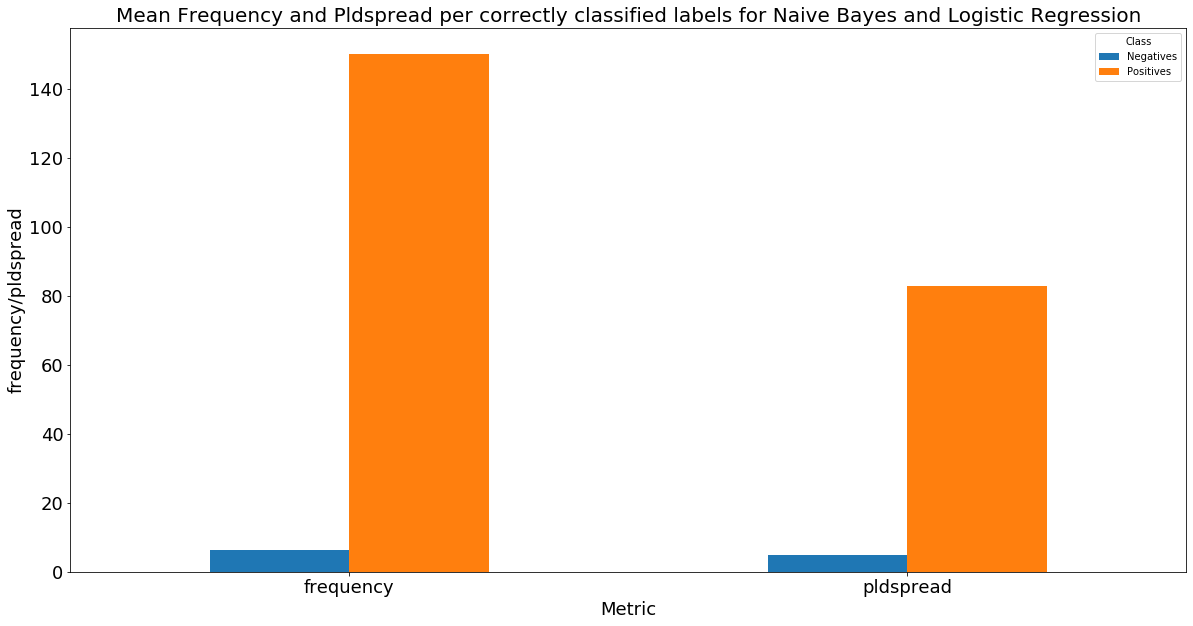

In [64]:
metrics_two.pivot("Metric", "Class", "Value").plot(kind='bar', figsize=(20,10))
plt.title('Mean Frequency and Pldspread per correctly classified labels for Naive Bayes and Logistic Regression',
         fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.xlabel('Metric', fontsize=18)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel('frequency/pldspread', fontsize=18)
#plt.yticks([0,325])

In [55]:
# all zero 
wrong_as_zero = test_all[(test_all['label'] == 1) &
                    (test_all['Prediction'] == 0) &
                    (test_all['Prediction_lr'] == 0)]
wrong_as_zero

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_lr,Occurrence_In_Text
13,flevoland,region,1,1,1,133065030,['p8a'],0,0,0,...,0,0,1,0,0,0,1,0,0,1.0
23,bapat,name,1,1,1,202072700,['p8a'],0,0,0,...,0,0,1,0,0,0,1,0,0,1.0
75,bidesiya,film,1,1,1,379439661,['p5'],0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
228,misti,place,1,1,1,374223504,['p8a'],0,0,0,...,0,0,1,0,0,0,1,0,0,1.0
254,selkie,animal,1,1,1,396424801,['p3a'],0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347865,servisair,agent,1,1,1,17169266,['p5'],0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
347966,clonakilty,village,2,2,2,218112454,"['p5', 'p1']",1,0,0,...,0,0,0,0,0,0,1,0,0,1.0
348028,ultop,toy,1,1,1,325455828,['p8a'],0,0,0,...,0,0,1,0,0,0,1,0,0,1.0
348055,kalatong,dance,3,1,2,357961278,"['p8a', 'p8a', 'p8a']",0,0,0,...,0,0,3,0,0,0,1,0,0,1.5


In [56]:
# all one
wrong_as_one = test_all[(test_all['label'] == 0) &
                    (test_all['Prediction'] == 1) &
                    (test_all['Prediction_lr'] == 1)]
wrong_as_one

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_lr,Occurrence_In_Text
5,particle,hydrocarbon,14,4,5,82722942,"['p5', 'p8a', 'p1', 'p8a', 'p1', 'p5', 'p1', '...",3,0,0,...,0,0,3,0,0,0,0,1,1,2.800000
22,x,symbol,377,23,184,54062993,"['p26p5p4p29ap8ap27bp43', 'p8ap8b', 'p5p8ap3a'...",7,2,0,...,0,0,94,4,1,0,0,1,1,2.048913
37,sequest,database,3,1,3,45564998,"['p5', 'p5']",0,0,0,...,0,0,0,0,0,0,0,1,1,1.000000
73,rust,particulate,66,3,15,417639571,"['p5p4p1', 'p1', 'p1', 'p1', 'p1', 'p1', 'p1',...",10,0,0,...,0,0,0,0,0,0,0,1,1,4.400000
99,benzoxazole,ring,2,1,2,355997993,"['p5', 'p5']",0,0,0,...,0,0,0,0,0,0,0,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347842,structure,articulation,2,1,2,253079822,"['p5', 'p5']",0,0,0,...,0,0,0,0,0,0,0,1,1,1.000000
347921,auction,fund,92,11,81,71693712,"['p5p1p20a', 'p1p3a', 'p5p3a', 'p1p20a', 'p8a'...",10,0,0,...,0,0,5,1,0,0,0,1,1,1.135802
348007,otter,leader,9,3,8,154944353,"['p1', 'p5', 'p3a', 'p5', 'p1', 'p3a', 'p1', '...",4,0,0,...,0,0,0,0,0,0,0,1,1,1.125000
348066,fire,film,335,18,209,170218311,"['p5p23cp2p1p21dp10p8ap8bp3ap43', 'p5p1p10p3a'...",8,23,0,...,0,0,118,10,0,0,0,1,1,1.602871


In [57]:
# get mean metrics for frequency, pldapread an occurence
all_zero_chart = wrong_as_zero[['frequency', 'pldspread', 'Occurrence_In_Text']]
all_zero_chart = pd.DataFrame(all_zero_chart.mean()).reset_index()
all_zero_chart.columns = ['Metric', 'Value']
all_zero_chart['Class'] = ['Negatives'] * 3
all_zero_chart

,Metric,Value,Class
0,frequency,6.386563,Negatives
1,pldspread,4.814991,Negatives
2,Occurrence_In_Text,1.083096,Negatives


In [58]:
# get mean metrics for frequency, pldapread an occurence
all_one_chart = wrong_as_one[['frequency', 'pldspread', 'Occurrence_In_Text']]
all_one_chart = pd.DataFrame(all_one_chart.mean()).reset_index()
all_one_chart.columns = ['Metric', 'Value']
all_one_chart['Class'] = ['Positives'] * 3
all_one_chart

,Metric,Value,Class
0,frequency,150.016891,Positives
1,pldspread,82.795433,Positives
2,Occurrence_In_Text,1.834296,Positives


In [59]:
# all_metrics
metrics = pd.concat([all_zero_chart,
                    all_one_chart])

In [60]:
# two metrics
metrics_two = metrics[metrics.Metric != 'Occurrence_In_Text']
metrics_two

,Metric,Value,Class
0,frequency,6.386563,Negatives
1,pldspread,4.814991,Negatives
0,frequency,150.016891,Positives
1,pldspread,82.795433,Positives


In [61]:
metrics_one = metrics[metrics.Metric == 'Occurrence_In_Text']
metrics_one

,Metric,Value,Class
2,Occurrence_In_Text,1.083096,Negatives
2,Occurrence_In_Text,1.834296,Positives


Text(0, 0.5, 'frequency/pldspread')

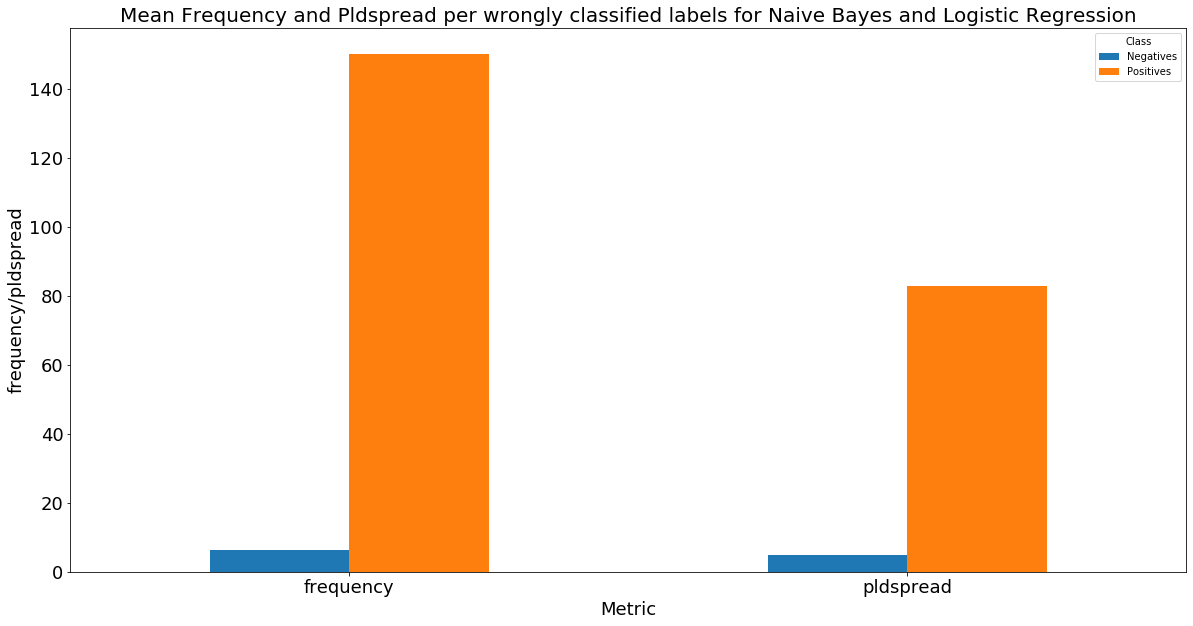

In [62]:
metrics_two.pivot("Metric", "Class", "Value").plot(kind='bar', figsize=(20,10))
plt.title('Mean Frequency and Pldspread per wrongly classified labels for Naive Bayes and Logistic Regression',
         fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.xlabel('Metric', fontsize=18)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel('frequency/pldspread', fontsize=18)